**CASO DE ESTUDIO**

Analizará un conjunto de datos sobre el cambio del nivel medio del mar a nivel mundial desde 1880. Utilizarás los datos para predecir el cambio del nivel del mar hasta el año 2050.

**Utiliza los datos para completar las siguientes tareas:**

1. Utiliza Pandas para importar los datos de epa-sea-level.csv.
2. Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
3. Usa la función linregress de scipy.stats para obtener la pendiente e intersección con el eje y de la línea de mejor encaje. Dibuja la línea de mejor encaje sobre el diagrama de dispersión. Haz que la línea pase por el año 2050 para predecir el aumento del nivel del mar en ese año.
4. Traza una nueva línea de mejor encaje utilizando datos del año 2000 hasta el año más reciente del conjunto de datos. Haz que la línea pase también por el año 2050 para predecir la subida del nivel del mar en 2050 si el ritmo de subida continúa como desde el año 2000.
5. La etiqueta x debe ser Year, la etiqueta y debe ser Sea Level (inches) y el título debe ser Rise in Sea Level.

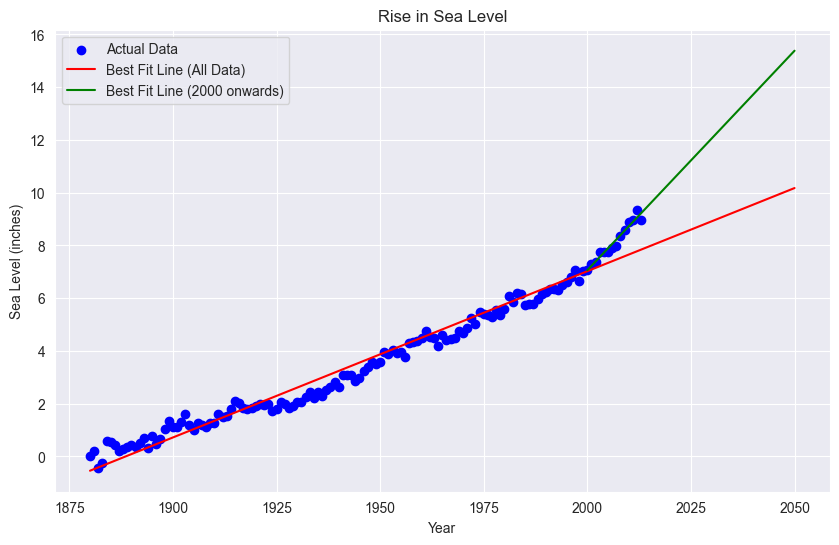

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
def draw_plot():
    df = pd.read_csv('data/epa-sea-level.csv')
    y = df['CSIRO Adjusted Sea Level'].astype(float)
    x = df['Year']
    slope, intercept, *_ = linregress(x, y)
    years_extended = np.arange(1880, 2051)
    line_of_best_fit = intercept + slope * years_extended

    df_recent = df[df['Year'] >= 2000]
    x_recent = df_recent['Year']
    y_recent = df_recent['CSIRO Adjusted Sea Level'].astype(float)
    slope_recent, intercept_recent, *_ = linregress(x_recent, y_recent)
    years_extended_recent = np.arange(2000, 2051)
    line_of_best_fit_recent = intercept_recent + slope_recent * years_extended_recent

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x, y, label='Actual Data', color='blue')
    ax.plot(years_extended, line_of_best_fit, label='Best Fit Line (All Data)', color='red')
    ax.plot(years_extended_recent, line_of_best_fit_recent, label='Best Fit Line (2000 onwards)', color='green')
    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Level (inches)')
    ax.set_title('Rise in Sea Level')
    ax.legend()

    plt.savefig('images/sea_level_plot.png')
    return plt.gca()

fig = draw_plot()